In [1]:



# import yfinance as yf   <- esto era para predecir stock, tristemente no funcionó y perdí la casa


#cargar datos y calculos mágicos
import numpy as np
import pandas as pd

#plots 
from matplotlib import pyplot as plt 
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot 
import seaborn as sns
import time

#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM,GRU
# from tensorflow.keras.models import Sequential

#escalar datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib #guardar el scaler





tf.random.set_seed(0)

In [2]:
df = pd.read_parquet('datos15til24resampledwxwy.parquet.gzip')
# df2=pd.read_parquet('datos15til24resampled.parquet.gzip')
# df.shape,df2.shape
# df.columns,df2.columns
df

,Temp ext,Hum ext,PR,Rafaga 10m,Tasa precip,Lluvia hoy,Presión,Cont lluvia,Temp int,Humedad int,...,Evap,Evap anual,Temp Ap,Rad Solar T,Horas de sol,Dir actual,RG-11 Rain,Lluvia desde 00:00,wx,wy
ds,,,,,,,,,,,,,,,,,,,,,
2015-03-31 13:00:00,26.5,31.0,8.0,20.9,0.0,0.0,1014.5,3.3,26.6,48.0,...,0.0,0.0,24.4,462.0,0.0,211.500000,0.0,3.3,-8.863656,-7.049562
2015-03-31 14:00:00,27.3,26.0,6.1,23.4,0.0,0.0,1013.6,3.3,26.6,45.0,...,0.0,0.0,24.0,175.0,0.0,193.483333,0.0,3.3,-10.551653,-3.243121
2015-03-31 15:00:00,28.2,26.0,6.9,22.0,0.0,0.0,1012.9,3.3,25.8,45.0,...,0.0,0.0,25.6,0.0,0.0,188.616667,0.0,3.3,-11.587035,-2.221017
2015-03-31 16:00:00,28.6,30.0,9.4,14.8,0.0,0.0,1012.0,3.3,25.8,45.0,...,0.0,0.0,25.9,0.0,0.0,193.116667,0.0,3.3,-8.023175,-1.828481
2015-03-31 17:00:00,28.6,31.0,9.8,14.8,0.0,0.0,1011.9,3.3,25.8,42.0,...,0.0,0.0,26.7,0.0,0.0,174.400000,0.0,3.3,-8.238028,0.288265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12 08:00:00,15.7,57.0,7.2,7.2,0.0,0.0,1015.5,2583.3,25.2,30.0,...,0.0,0.0,14.3,335.0,0.0,292.700000,0.0,0.0,1.481261,-3.662468
2024-11-12 09:00:00,18.2,47.0,6.7,13.3,0.0,0.0,1015.5,2583.3,24.8,31.0,...,0.0,0.0,16.5,582.0,0.0,303.016667,0.0,0.0,3.299500,-5.099136
2024-11-12 10:00:00,19.9,37.0,4.8,14.8,0.0,0.0,1015.1,2583.3,25.3,29.0,...,0.0,0.0,18.0,796.0,0.0,301.133333,0.0,0.0,4.167287,-5.374683


In [3]:
#Create a new 'ds' column by combining Date and Hour (Prophet expects a column 'ds' for time variable)

df.columns = df.columns.str.lower()
# df2.columns = df2.columns.str.lower()

#parquet
# df2['ds'] = pd.to_datetime((df2['fecha'] + ' ' + df2['hora']), format="%d/%m/%y %H:%M")


# #csv
# # df['ds'] = pd.to_datetime((df['fecha'] + ' ' + df['hora']), format="%m/%d/%Y %H:%M")

df['ds']=df.index
df['ds']





# df=df.drop(columns=['fecha','hora'],axis=1)
# df2=df2.set_index('ds',drop=False)

#resample de hora en hora, porque hay datos que fueron grabados cada 30 min o cada 5 en el listado
#por algún motivo
# df2 = df2.resample("h", label="right").last()
# df2.shape

#cambiar nombres
df = df.rename(columns={
'temp ext':'y',
'hum ext':'humext',
'temp int':'tempint',
'humedad int':'humint',
'presión' : 'pres',
'temp ap': 'tempap',
"rad solar t": "radsolar",
})


# #añadir viento como dirección y vector

# wv = df.pop('vel viento')
# wd_rad = df.pop('dir prom')*np.pi / 180
# df['wx'] = wv*np.cos(wd_rad)
# df['wy'] = wv*np.sin(wd_rad)

#lo quité a lo de arriba porque ya lo metí en el dataframe




#borro las columnas que siempre son 0

siemprecero=['uv','solar rad','evap','evap anual','horas de sol','rg-11 rain']
df=df.drop(columns=siemprecero,axis=1)

#borro las filas que tienen más de un valor para el mismo horario (no sé por qué pasó esto pero pasó)

# df=df.drop_duplicates(subset=df['ds'])


df=df.fillna(method='ffill')
nan_rows = df[df['ds'].isnull()]
nan_rows

df.head()


C:\Users\soysa\AppData\Local\Temp\ipykernel_2484\4113982056.py:62: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,y,humext,pr,rafaga 10m,tasa precip,lluvia hoy,pres,cont lluvia,tempint,humint,viento actual,wind chill,heat index,tempap,radsolar,dir actual,lluvia desde 00:00,wx,wy,ds
ds,,,,,,,,,,,,,,,,,,,,
2015-03-31 13:00:00,26.5,31.0,8.0,20.9,0.0,0.0,1014.5,3.3,26.6,48.0,15.245000,26.5,26.5,24.4,462.0,211.500000,3.3,-8.863656,-7.049562,2015-03-31 13:00:00
2015-03-31 14:00:00,27.3,26.0,6.1,23.4,0.0,0.0,1013.6,3.3,26.6,45.0,15.133333,27.3,26.5,24.0,175.0,193.483333,3.3,-10.551653,-3.243121,2015-03-31 14:00:00
2015-03-31 15:00:00,28.2,26.0,6.9,22.0,0.0,0.0,1012.9,3.3,25.8,45.0,16.156667,28.2,27.1,25.6,0.0,188.616667,3.3,-11.587035,-2.221017,2015-03-31 15:00:00
2015-03-31 16:00:00,28.6,30.0,9.4,14.8,0.0,0.0,1012.0,3.3,25.8,45.0,11.350000,28.6,27.5,25.9,0.0,193.116667,3.3,-8.023175,-1.828481,2015-03-31 16:00:00
2015-03-31 17:00:00,28.6,31.0,9.8,14.8,0.0,0.0,1011.9,3.3,25.8,42.0,11.456667,28.6,27.6,26.7,0.0,174.400000,3.3,-8.238028,0.288265,2015-03-31 17:00:00


In [4]:
timestamp_s = df['ds'].map(pd.Timestamp.timestamp)
# timestamp_s = df.index.map(pd.Timestamp.timestamp)
timestamp_s=timestamp_s-timestamp_s.iloc[0]
# timestamp_s2 = df2['ds'].map(pd.Timestamp.timestamp)
# # timestamp_s = df.index.map(pd.Timestamp.timestamp)
# timestamp_s2=timestamp_s2-timestamp_s2.iloc[0]
day = 24*60*60 #esto porque los datos estÃ¡n en minutos como minima resoluciÃ³n
year = (365.2425)*day

df['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))



# df2['day_sin'] = np.sin(timestamp_s2 * (2 * np.pi / day))
# df2['day_cos'] = np.cos(timestamp_s2 * (2 * np.pi / day))
# df2['year_sin'] = np.sin(timestamp_s2 * (2 * np.pi / year))
# df2['year_cos'] = np.cos(timestamp_s2 * (2 * np.pi / year))



In [5]:
columnas_a_usar=['y','wx','wy','humext','pr',
                 'day_cos','day_sin','year_cos','year_sin']



df_input=df[columnas_a_usar]
# df_input2=df2[columnas_a_usar]
# df_input

start_date = '2019-05-01 00:00:00'
end_date = '2021-08-20 13:13:00'

# Filtrar el DataFrame usando .loc[]
df_input = df_input[(df_input.index >= start_date) & (df_input.index <= end_date)]
# df_input2 = df_input2[(df_input2.index >= start_date) & (df_input2.index <= end_date)]

df_input.shape

(20222, 9)

(<Axes: title={'center': 'year wave'}, xlabel='ds'>,
 <Axes: title={'center': 'year wave'}, xlabel='ds'>)

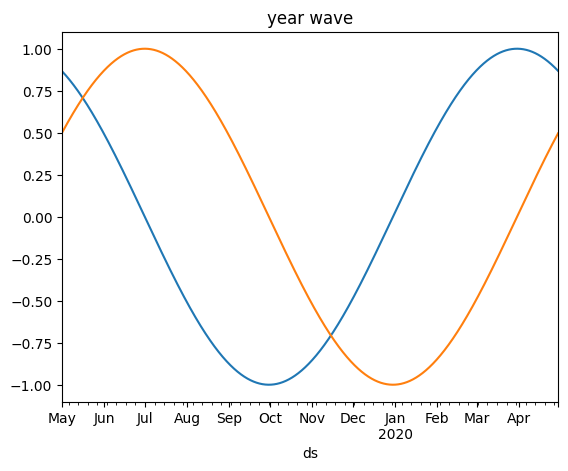

In [6]:
df_input['year_cos'][:365*24].plot(),df_input['year_sin'][:365*24].plot(title='year wave')


(<Axes: title={'center': 'day wave'}, xlabel='ds'>,
 <Axes: title={'center': 'day wave'}, xlabel='ds'>)

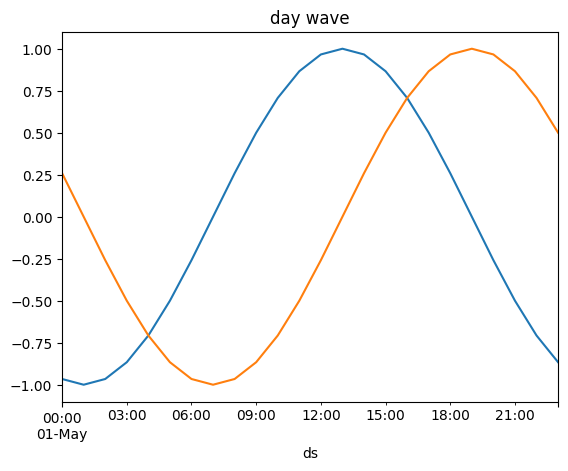

In [7]:
df_input['day_cos'][:24].plot(),df_input['day_sin'][:24].plot(title='day wave')

Text(0.5, 1.0, 'Correlation Heatmap')

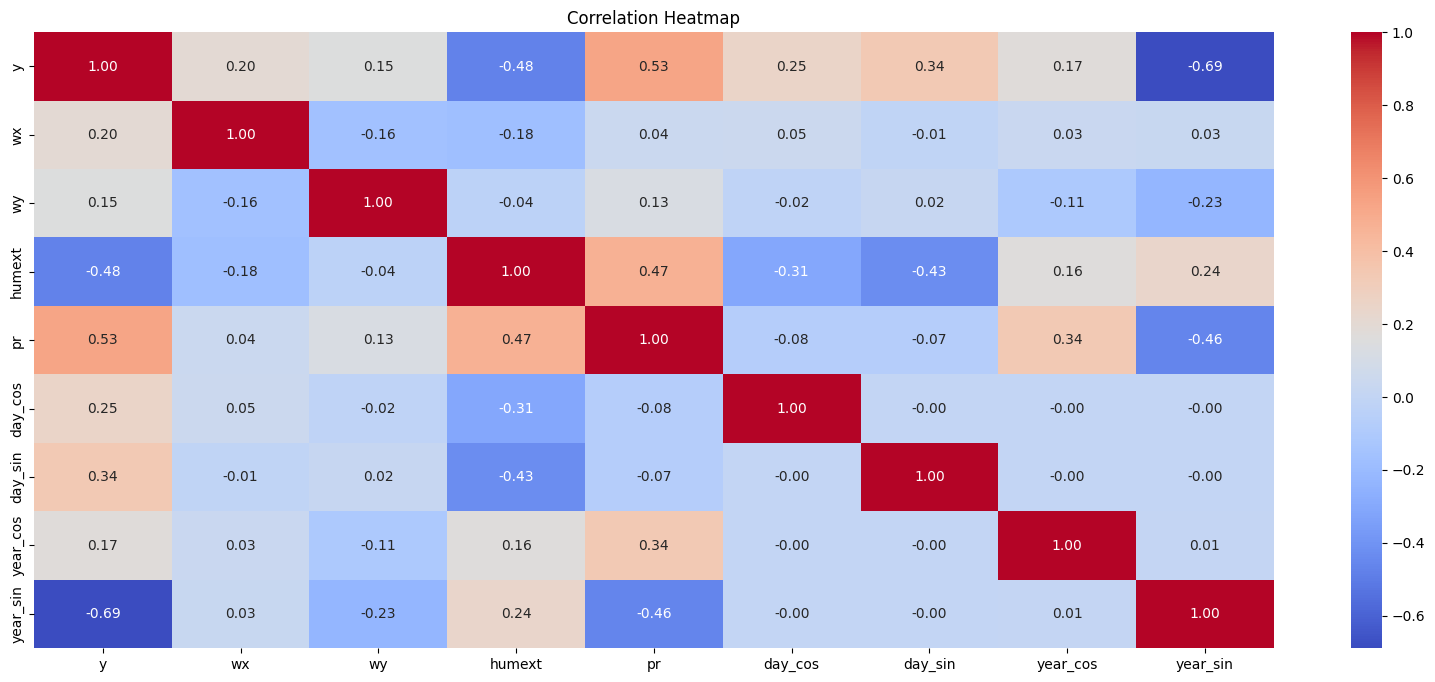

In [8]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_input.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

In [9]:
#constantes de corte
len_100=len(df_input)
len_70=int(len_100*.7)
len_80=int(len_100*.8)
len_90=int(len_100*.9)

#constantes de predicción

n_lookback=24*7
n_forecast=24*2
n_columnas=9

In [10]:
df_np_full=df_input.to_numpy()                 #transformo a numpy para luego usar el scaler
#esto para entrenar con + datos
df_np80_train=df_np_full.copy()[:len_80,:]    
df_np80_val=df_np_full.copy()[len_80:,:] 

np80_scaler=MinMaxScaler()

df_np80_train_scaled=np80_scaler.fit_transform(df_np80_train)
df_np80_val_scaled=np80_scaler.transform(df_np80_val)

joblib.dump(np80_scaler, 'modelos/np80_scaler.gz')



['modelos/np80_scaler.gz']

In [11]:
columnas_a_usar = np.array(columnas_a_usar)
for i in range(6):
    print('test' + columnas_a_usar[i])

testy
testwx
testwy
testhumext
testpr
testday_cos


In [12]:
def array_to_X_y2(array_datos,n_lookback=24*7,n_forecast=48,columna=0):
    # df_np= df.to_numpy()
    #print(np.shape(df_np))
    X=[]
    y=[]
    for i in range(len(array_datos)-n_lookback-n_forecast): #itera X - 168 - 48 por defecto
        row = [r for r in array_datos[i:i+n_lookback]]      #hace un array de forma de (imax, n_lookback , columnas de input )
        X.append(row)
        label=[array_datos[i+n_lookback:i+n_lookback+n_forecast,columna]] #esto cambiar por nombre de columna porque si no va a ser horrible 
                                                                    # 0 es temperatura
        # label=[df_np[i+n_lookback:i+n_lookback+n_forecast,0],df_np[i+n_lookback:i+n_lookback+n_forecast,4]] #esto cambiar por nombre de columna porque si no va a ser horrible 
        #recordar cuál columna es cada índice
        y.append(np.array(label).T)
        # print(np.shape(y))
        # print(y[-1])
        
    return np.array(X),np.array(y)

In [13]:
def crear_modelo(RNN=GRU,in_shape=(n_lookback,n_columnas),units=50):
    modelo = Sequential()
    modelo.add(RNN(units=units, return_sequences=True, input_shape=in_shape))
    modelo.add(RNN(units=units))
    modelo.add(Dense(n_forecast))
    modelo.summary()
    modelo.compile(loss='mean_squared_error', optimizer='adam')

    return modelo    

    # model2 = Sequential()
    # model2.add(GRU(units=50, return_sequences=True, input_shape=(n_lookback, 10)))
    # model2.add(GRU(units=50))
    # model2.add(Dense(n_forecast))
    # model2.summary()
    # model2.compile(loss='mean_squared_error', optimizer='adam')
    # model2.fit(X80_train, y80_train, epochs=2, batch_size=32,validation_data=(X80_val,y80_val))

In [14]:
arranque=19909+48+2
for i in range(5):
    #full train
    X80_train,y80_train=array_to_X_y2(df_np80_train_scaled,columna=i)
    X80_val,y80_val=array_to_X_y2(df_np80_val_scaled,columna=i)
    
    
    model2=crear_modelo()
    model2.fit(X80_train, y80_train, epochs=2, batch_size=32,validation_data=(X80_val,y80_val))
    
    save_string= 'modelos/GRU80_20'+'_'+ columnas_a_usar[i]+'_' + time.strftime('%d-%m-%Y_%H-%M__')
    save_string_model=save_string+'.keras'
    save_string_graph=save_string+'.html'
    
    print(f'{save_string}\n{save_string_model}\n{save_string_graph}')
    print(X80_train.shape, y80_train.shape)

    model2.save(save_string_model)
    
    df_np_full_scaled=np80_scaler.transform(df_np_full)
    X_new=df_np_full_scaled[arranque+n_forecast:arranque+n_lookback+n_forecast,:]
    b=df_input.index[arranque+n_forecast:arranque+n_lookback+n_forecast]
    print(X_new.shape)
    dy=model2.predict(np.reshape(X_new,(1,n_lookback,n_columnas))).flatten()
    print(dy.shape)



    a=np.column_stack([np.zeros(shape=(n_forecast,i)), dy, np.zeros(shape=(n_forecast,n_columnas-1-i))])
    dy2=np80_scaler.inverse_transform(a)[:,i]

    b=df_input.index[arranque+n_forecast+n_lookback:arranque+n_forecast+n_lookback+n_forecast]
    c=df_input.index[arranque+n_forecast:arranque+n_forecast+n_lookback]
    xd=X_new[:,i]
    xd=np.column_stack([np.zeros(shape=(n_lookback,i)), xd, np.zeros(shape=(n_lookback,n_columnas-1-i))])



    xd=np80_scaler.inverse_transform(xd)[:,i]
    corte=df.loc['2021-08']
    corte.index
    


    pic1=go.Scatter(x=b, y=dy2,name='predict')
    pic2=go.Scatter(x=c, y=xd,name='x_test_real')
    pic3=go.Scatter(x=corte.index,y=corte[columnas_a_usar[i]],name='real')
    fig = make_subplots(specs=[[{"secondary_y": False}]])
    fig.add_trace(pic1)
    fig.add_trace(pic2)
    fig.add_trace(pic3)
    fig['layout'].update(height = 800, width = 1000, title = columnas_a_usar[i]+', predicción y real',xaxis=dict(tickangle=-90))
    # iplot(fig)

    fig.write_html(save_string_graph)


c:\Users\soysa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 168, 50)        │         9,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         2,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,898 (105.07 KB)

 Trainable params: 26,898 (105.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 60s 110ms/step - loss: 0.0416 - val_loss: 0.0069
Epoch 2/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - loss: 0.0073 - val_loss: 0.0064
modelos/GRU80_20_y_07-12-2024_10-51__
modelos/GRU80_20_y_07-12-2024_10-51__.keras
modelos/GRU80_20_y_07-12-2024_10-51__.html
(15961, 168, 9) (15961, 48, 1)
(168, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
(48,)


c:\Users\soysa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 168, 50)        │         9,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         2,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,898 (105.07 KB)

 Trainable params: 26,898 (105.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 97ms/step - loss: 0.0386 - val_loss: 0.0102
Epoch 2/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - loss: 0.0093 - val_loss: 0.0098
modelos/GRU80_20_wx_07-12-2024_10-53__
modelos/GRU80_20_wx_07-12-2024_10-53__.keras
modelos/GRU80_20_wx_07-12-2024_10-53__.html
(15961, 168, 9) (15961, 48, 1)
(168, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
(48,)


c:\Users\soysa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 168, 50)        │         9,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         2,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,898 (105.07 KB)

 Trainable params: 26,898 (105.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - loss: 0.0263 - val_loss: 0.0063
Epoch 2/2
499/499 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - loss: 0.0097 - val_loss: 0.0062
modelos/GRU80_20_wy_07-12-2024_10-55__
modelos/GRU80_20_wy_07-12-2024_10-55__.keras
modelos/GRU80_20_wy_07-12-2024_10-55__.html
(15961, 168, 9) (15961, 48, 1)
(168, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
(48,)


c:\Users\soysa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 168, 50)        │         9,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 48)             │         2,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,898 (105.07 KB)

 Trainable params: 26,898 (105.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
test=np.array([1,2,3])
test2=np.array([4,5,6])
test3=np.array([7,8,9])

In [ ]:
np.column_stack([test,test2,test3])

In [ ]:
time.strftime('%d-%m-%Y %H.%M')

In [ ]:
corte[columnas_a_usar[3]].plot()
columnas_a_usar[3]

In [ ]:
df['ds'].tail